In [1]:
# Important libraries

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
np.random.seed(4440)

In [2]:
# Functions

S1 = lambda x: np.sqrt(8*x/np.pi)#*(1 + 1/(4*N) - 3/(64*N**2))
S2 = lambda x: np.pi*x/np.log(8*x)#*(1 + 0.422784/np.log(8*x) - 0.466187/np.log(8*x)**2)
S3 = lambda x: 0.66*x# + 0.573921*x**(1/2) + 0.449530

<h3>P_1.1</h3>

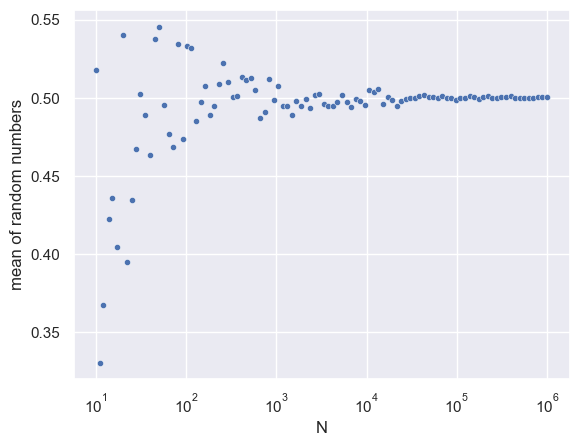

In [11]:
plot_points = 100
N_list = np.int64(np.logspace(1,6,plot_points))
mean_list = []

for N in N_list:
    mean_list.append(np.random.uniform(size=N).mean())

sns.scatterplot(x=N_list, y=mean_list, s=20)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('mean of random numbers')
plt.show()

<h3>P_1.2</h3>

In [4]:
NMC = 10**4
N = 1000

# 1D
one_d = (np.random.choice((-1,1), size=[N,NMC]).sum(0)**2).mean()

# 2D
data = np.random.choice((-2,-1,1,2), size=[N,NMC])

d = (data == -2).sum(0)
l = (data == -1).sum(0)
r = (data == 1).sum(0)
u = (data == 2).sum(0)

lr = r - l
du = u - d
two_d = (lr**2 + du**2).mean()

print("Random Walk")
print(f"1D - R^2 = {one_d}")
print(f"2D - R^2 = {two_d}")

Random Walk
1D - R^2 = 1017.7676
2D - R^2 = 1003.1196


<h3>P_1.3</h3>

1D) y = 1.010*x - 5.440

2D) y = 1.003*x - 0.755




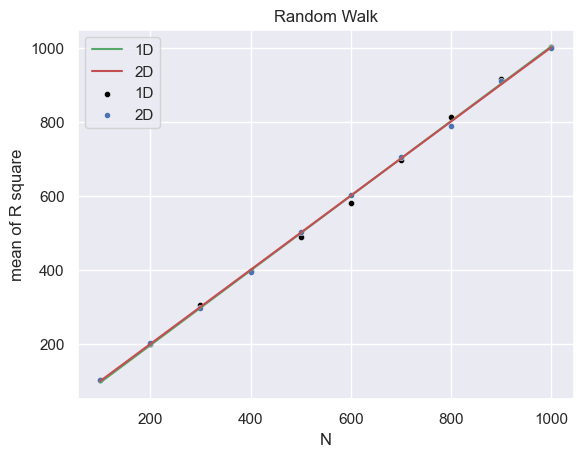

In [5]:
NMC = 10**4
N_list = np.int64(np.linspace(100, 1000, 10))

mean_Rsquare_1D = []
mean_Rsquare_2D = []

# 1D
for N in N_list:
    mean_Rsquare_1D.append((np.random.choice((-1,1), size=[N,NMC]).sum(0)**2).mean())

# 2D
for N in N_list:
    data = np.random.choice((-2,-1,1,2), size=[N,NMC])
    
    d = (data == -2).sum(0)
    l = (data == -1).sum(0)
    r = (data == 1).sum(0)
    u = (data == 2).sum(0)
    
    lr = r - l
    du = u - d
    mean_Rsquare_2D.append((lr**2 + du**2).mean())

# y = a*x + b
mean_x = np.mean(N_list)
mean_y_1D = np.mean(mean_Rsquare_1D)
mean_y_2D = np.mean(mean_Rsquare_2D)

a_1D = ((N_list - mean_x)*(mean_Rsquare_1D - mean_y_1D)).sum()/((N_list - mean_x)**2).sum()
a_2D = ((N_list - mean_x)*(mean_Rsquare_2D - mean_y_2D)).sum()/((N_list - mean_x)**2).sum()
b_1D = mean_y_1D - a_1D * mean_x
b_2D = mean_y_2D - a_2D * mean_x

print(f'1D) y = {a_1D:.3f}*x {"+" if b_1D > 0 else "-"} {abs(b_1D):.3f}\n')
print(f'2D) y = {a_2D:.3f}*x {"+" if b_1D > 0 else "-"} {abs(b_2D):.3f}\n\n')

sns.lineplot(x=N_list, y=[a_1D*x+b_1D for x in N_list], label="1D", color='g')
sns.lineplot(x=N_list, y=[a_2D*x+b_2D for x in N_list], label="2D", color='r')
sns.scatterplot(x=N_list, y=mean_Rsquare_1D, s=20, label="1D", color='black')
sns.scatterplot(x=N_list, y=mean_Rsquare_2D, s=20, label="2D", color='b')

plt.title("Random Walk")
plt.xlabel('N')
plt.ylabel('mean of R square')
plt.show()

<h3>P_1.4</h3>

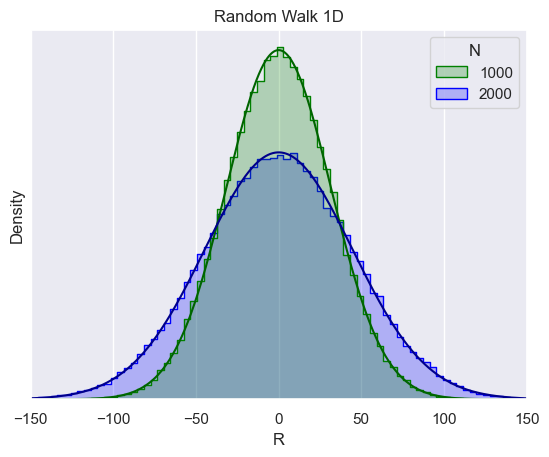

In [6]:
NMC = 10**5
N_list = np.array([1000, 2000])
mean_Rsquare_1D = []

binwidth = np.ceil(3.49*np.sqrt(N_list).mean()/NMC**(1/3))
if binwidth%2 == 1: binwidth += 1
    
x = np.linspace(-150, 150, NMC)
g = lambda x,s: np.exp(-(x/s)**2/2)/(s*np.sqrt(2*np.pi))

for N in N_list:
    mean_Rsquare_1D.append(np.random.choice((-1,1), size=[N,NMC]).sum(0))

df_1D = pd.DataFrame(data=mean_Rsquare_1D[0], columns=["R"])
df_1D = pd.concat([df_1D, pd.DataFrame(data=mean_Rsquare_1D[1], columns=["R"])], ignore_index=True)
df_1D["N"] = N_list[0]
df_1D.loc[NMC:, "N"] = N_list[1]

sns.histplot(data=df_1D, x="R", hue="N", binwidth=binwidth, palette=['green', 'blue'], stat='density', element="step", common_norm=False)
sns.lineplot(x=x, y=[g(i, np.sqrt(N_list[0])) for i in x], color='darkgreen')
sns.lineplot(x=x, y=[g(i, np.sqrt(N_list[1])) for i in x], color='darkblue')
plt.title("Random Walk 1D")
plt.xlim([-150, 150])
ax = plt.gca()
ax.set_yticks([])
plt.show()

<h3>P_1.5</h3>

1D | .........1e+04
2D | .........1e+04
3D | .........1e+04




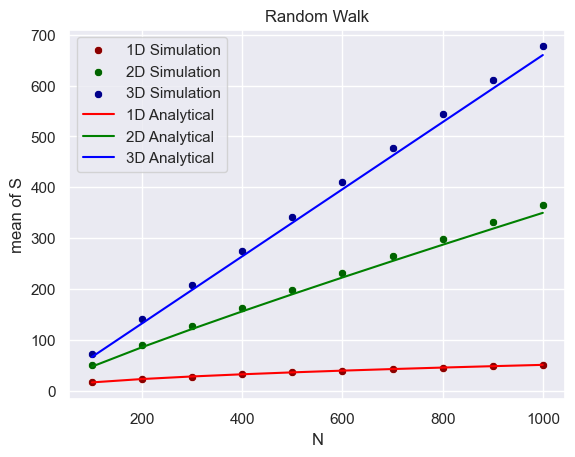

In [7]:
NMC = 10**4
N = 10**3
N_list = np.int64(np.linspace(100, 1000, 10))
colors = ['darkred', 'darkgreen', 'darkblue']

for dim_num in [1,2,3]:
    print(f"{dim_num}D |", end=' ')
    
    S = np.zeros(10)
    directions = list(range(-dim_num, dim_num+1))
    directions.pop(dim_num)
    
    for simulation in range(NMC):
        position = [0]*dim_num
        nodes_list = []
    
        for step in range(1, N+1):
            direction = np.random.choice(directions)

            for i in [1,2,3]:
                if abs(direction) == i: 
                    position[i-1] += int(direction/i)
                    break
                    
            if position not in nodes_list: nodes_list.append(position[:])
            if step%100 == 0: S[step//100 - 1] += len(nodes_list)

        if NMC >= 10:
            if (simulation + 1) % NMC == 0: print(f"{simulation+1:.0e}")
            elif (simulation + 1) % int(NMC/10) == 0: print(f".", end="")
        else:
            if (simulation + 1) % 1 == 0: print(f"{simulation+1:0.e}")
            elif (simulation + 1) % NMC == 0: print(f".", end="")
    S = S/NMC
    sns.scatterplot(x=N_list, y=S, label=f"{dim_num}D Simulation", color=colors[dim_num-1])

print("\n")
sns.lineplot(x=N_list, y=[S1(x) for x in N_list], label=f"1D Analytical", color="red")
sns.lineplot(x=N_list, y=[S2(x) for x in N_list], label=f"2D Analytical", color="green")
sns.lineplot(x=N_list, y=[S3(x) for x in N_list], label=f"3D Analytical", color="blue")
plt.title("Random Walk")
plt.xlabel('N')
plt.ylabel('mean of S')
plt.show()

<h3>P_1.6</h3>

c = 1e-02 | .........1e+05
c = 1e-03 | .........1e+05




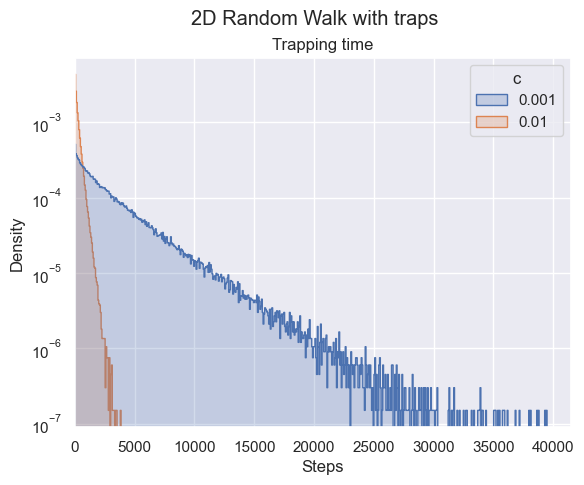

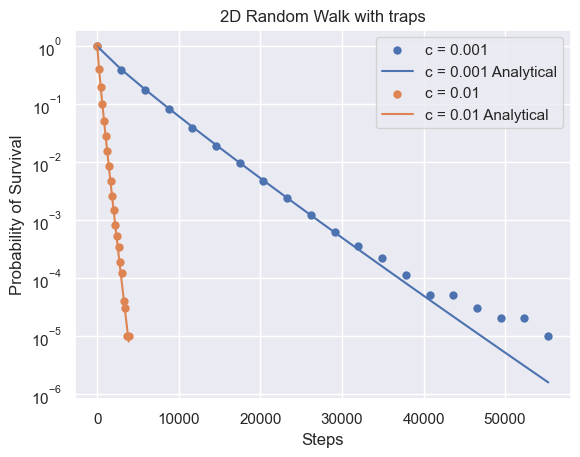

In [8]:
NMC = 10**5
xy_grid = (500, 500)
c = [10**-2, 10**-3]

steps_data = np.zeros((len(c), NMC))
possible_traps_positions = [[ix,iy] for ix in range(xy_grid[0]) for iy in range(xy_grid[1])]

for num, traps_density in enumerate(c):
    print(f"c = {traps_density:.0e} |", end=' ')
    num_of_traps = round(xy_grid[0]*xy_grid[1]*traps_density)
    
    for i in range(NMC):
        space = np.zeros(xy_grid)
        positions_of_traps = np.array(random.sample(possible_traps_positions, num_of_traps+1))
        position = positions_of_traps[0]
        space[positions_of_traps[1:,0],positions_of_traps[1:,1]] = -1
        
        steps = 0
        while space[position[0], position[1]] != -1:
            direction = np.random.choice(['L', 'R', 'U', 'D'])

            if direction == 'L': position[0] = (position[0]-1)%xy_grid[0]
            elif direction == 'R': position[0] = (position[0]+1)%xy_grid[0]
            elif direction == 'U': position[1] = (position[1]+1)%xy_grid[1]
            elif direction == 'D': position[1] = (position[1]-1)%xy_grid[1]
            steps += 1
            
        steps_data[num,i] = steps
        if NMC >= 10:
            if (i + 1) % NMC == 0: print(f"{i+1:.0e}")
            elif (i + 1) % int(NMC/10) == 0: print(f".", end="")
        else:
            if (i + 1) % 1 == 0: print(f"{i+1:0.e}")
            elif (i + 1) % NMC == 0: print(f".", end="")

df = pd.DataFrame(data=steps_data[0], columns=["Steps"])
for num,_ in enumerate(c[1:]):
    df = pd.concat([df, pd.DataFrame(data=steps_data[num+1], columns=["Steps"])], ignore_index=True)
    
df["c"] = c[0]
for num,traps_density in enumerate(c[1:]):
    df.loc[(num+1)*NMC:, "c"] = c[num+1]

print('\n')

sns.histplot(data=df, x="Steps", hue="c", stat="density",
     palette=sns.color_palette(n_colors=len(c)), element="step", common_norm=False)
plt.xlim([0,0.75*max(df.Steps)])
plt.title("Trapping time")
plt.suptitle("2D Random Walk with traps")
plt.yscale('log')
plt.show()

for concentration in c[::-1]:
    data = df[df.c == concentration]
    max_steps = int(max(data.Steps))
    x_data = np.linspace(1, max_steps, 20, dtype=int)

    y_data = []
    for i in x_data:
       y_data.append((data.Steps >= i).sum())
    y_data = np.array(y_data)/y_data[0]
    y_data

    sns.scatterplot(x=x_data, y=y_data, label=f'c = {concentration}', lw=0)
    sns.lineplot(x=x_data, y=(1 - concentration)**S2(x_data), label=f'c = {concentration} Analytical')
    
plt.title("2D Random Walk with traps")
plt.xlabel('Steps')
plt.ylabel('Probability of Survival')
plt.yscale('log')
plt.show()